# **Automatidata project**


I am currently working on a significant project at my data analytics firm, Automatidata. Our key client, the New York City Taxi & Limousine Commission (New York City TLC), recognizing the quality and impact of our previous endeavors, has given us a fascinating new challenge. They have entrusted us with the task of developing a machine learning model that can predict the likelihood of a customer not leaving a tip.

The primary purpose of this model is to integrate it into an app, which can notify taxi drivers about potential passengers who may not tip. Given the dependency of drivers on tips for their income, this feature would be instrumental in augmenting their revenue. By enabling the drivers to strategically select their customers, we aim to create a more profitable environment for them.

## Build a machine learning model

 
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps





### **Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [407]:

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle as pkl

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

pd.set_option('display.max_columns', None)

In [408]:

#==> Read in data

df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### **Feature engineering**



In [370]:

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [371]:
df0.payment_type.value_counts()


1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [409]:

df = df0.copy()

In [373]:
df1 = df[df['payment_type']==1]
df1.payment_type.value_counts()

1    15265
Name: payment_type, dtype: int64

##### **Target**



$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [374]:

tip_percent = df["tip_amount"]/(df["total_amount"]-df["tip_amount"])
df1["tip_percent"] = tip_percent
df1.head()

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/479544059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tip_percent"] = tip_percent


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.200000
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.238095
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.198630
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.300000
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.200000


In [375]:

generous = tip_percent
threshold = 0.20
df1["generous"] = generous >= threshold
df1.generous = df1.generous.astype(int)
#df1 = df1.drop(columns=["genreous","genereous"])

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/3979059304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["generous"] = generous >= threshold
/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/3979059304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.generous = df1.generous.astype(int)


##### **Features**

In [376]:
#==> ENTER YOUR CODE HERE
#df1 = df1.drop(columns = ["Unnamed: 0","store_and_fwd_flag"])
df1.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent',
       'generous'],
      dtype='object')

In [377]:


from datetime import datetime


df1['tpep_pickup_datetime'] = df1['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
df1['tpep_dropoff_datetime'] = df1['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))


/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/2921537987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_pickup_datetime'] = df1['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/2921537987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_dropoff_datetime'] = df1['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))


In [378]:
df1.tpep_dropoff_datetime

0       2017-03-25 09:09:47
1       2017-04-11 15:19:58
2       2017-12-15 07:34:08
3       2017-05-07 13:48:14
5       2017-03-25 20:42:11
                ...        
22692   2017-07-16 03:40:52
22693   2017-08-10 22:29:31
22695   2017-08-06 17:24:47
22697   2017-07-15 13:08:26
22698   2017-03-02 13:16:09
Name: tpep_dropoff_datetime, Length: 15265, dtype: datetime64[ns]

I am planning to introduce a new feature into the dataset named `duration`. This feature will represent the time span from the moment of pickup to the time of dropoff. 

To accomplish this:

1.  I'll calculate the difference between the `tpep_dropoff_datetime` and `tpep_pickup_datetime`, and store the result in the newly created `duration` column.
2.  Subsequently, I'll convert the values in the `duration` column to a more accessible unit, specifically seconds, for easier analysis and interpretation.

In [379]:

# Create 'duration' column as difference between 'tpep_dropoff_datetime' and 'tpep_pickup_datetime'
df1['duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']

# Convert 'duration' to seconds
df1['duration_seconds'] = df1['duration'].dt.total_seconds()


/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/2999431335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']
/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/2999431335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration_seconds'] = df1['duration'].dt.total_seconds()


In order to have a clear understanding of travel patterns during different days of the week, I will be creating a new column labeled `day`. This column will exclusively feature the weekday corresponding to each passenger pickup.

After that, for the sake of uniformity and easier data handling, I will transform all the entries in the `day` column into lowercase. This step will assist in avoiding any potential case-sensitive discrepancies in future analyses.

In [380]:

df1["day"] = df1["tpep_pickup_datetime"].dt.day_name()

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/1322828056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["day"] = df1["tpep_pickup_datetime"].dt.day_name()


In [381]:
df1.duration

0       0 days 00:14:04
1       0 days 00:26:30
2       0 days 00:07:12
3       0 days 00:30:15
5       0 days 00:08:00
              ...      
22692   0 days 00:18:01
22693   0 days 00:09:27
22695   0 days 00:40:48
22697   0 days 00:11:56
22698   0 days 00:13:20
Name: duration, Length: 15265, dtype: timedelta64[ns]

Following the analysis of pickup times, I plan to segment the data into specific time frames to better understand travel patterns. Consequently, I'll create four new columns, each representing a distinct time interval:

1. `am_rush` - early morning rush hours, from 06:00 to just before 10:00.
2. `daytime` - regular daytime hours, from 10:00 to just before 16:00.
3. `pm_rush` - late afternoon rush hours, from 16:00 to just before 20:00.
4. `nighttime` - nighttime hours, from 20:00 to just before 06:00 the next day.

Initially, each of these columns will be populated with the pickup hour extracted from the `tpep_pickup_datetime` field. The values will then be converted to binary (0 = no, 1 = yes) to indicate whether a trip started during the respective time period. This categorization will provide valuable insights for further analysis.


In [382]:
df1["hour"] = df1["tpep_pickup_datetime"].dt.hour

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/3796334796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["hour"] = df1["tpep_pickup_datetime"].dt.hour


In [383]:
df1["hour"]

0         8
1        14
2         7
3        13
5        20
         ..
22692     3
22693    22
22695    16
22697    12
22698    13
Name: hour, Length: 15265, dtype: int64

In [384]:

df1["am_rush"] = df1["tpep_pickup_datetime"].dt.hour
df1["daytime"] = df1["tpep_pickup_datetime"].dt.hour
df1["pm_rush"] = df1["tpep_pickup_datetime"].dt.hour
df1["nighttime"] = df1["tpep_pickup_datetime"].dt.hour

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/3623527474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["am_rush"] = df1["tpep_pickup_datetime"].dt.hour
/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/3623527474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["daytime"] = df1["tpep_pickup_datetime"].dt.hour
/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/3623527474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [385]:
df1[(df1["am_rush"]==0)&(df1["daytime"]==0)&(df1["pm_rush"]==0)&(df1["nighttime"]==0)]["hour"]

23       0
91       0
155      0
167      0
284      0
        ..
22391    0
22437    0
22446    0
22531    0
22606    0
Name: hour, Length: 496, dtype: int64

In [386]:
df1.dtypes

Unnamed: 0                         int64
VendorID                           int64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                    int64
trip_distance                    float64
RatecodeID                         int64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
tip_percent                      float64
generous                           int64
duration                 timedelta64[ns]
duration_seconds                 float64
day                               object
hour                               int64
am_rush         

In [387]:
df1.am_rush.value_counts()

18    1015
19    1000
21     927
20     913
22     852
17     785
14     778
9      767
8      752
16     738
15     721
13     717
12     715
11     694
23     690
10     663
7      632
0      496
1      354
6      329
2      275
3      173
5      143
4      136
Name: am_rush, dtype: int64

In [388]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour < 10:
        return 1
    else:
        return 0

df1["am_rush"] = df1["am_rush"].apply(am_rush)
df1.am_rush.head()

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/1016526119.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["am_rush"] = df1["am_rush"].apply(am_rush)


0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

In [390]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour < 16:
        return 1
    else:
        return 0
    

In [391]:
# Apply 'daytime()' function to the 'daytime' series

df1["daytime"] = df1["daytime"].apply(daytime)
df1.daytime

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/510583022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["daytime"] = df1["daytime"].apply(daytime)


0        0
1        1
2        0
3        1
5        0
        ..
22692    0
22693    0
22695    0
22697    1
22698    1
Name: daytime, Length: 15265, dtype: int64

In [392]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour < 20:
        return 1
    else:
        return 0

In [393]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE
df1["pm_rush"] = df1["pm_rush"].apply(pm_rush)
df1.pm_rush

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/2691292227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pm_rush"] = df1["pm_rush"].apply(pm_rush)


0        0
1        0
2        0
3        0
5        0
        ..
22692    0
22693    0
22695    1
22697    0
22698    0
Name: pm_rush, Length: 15265, dtype: int64

In [394]:
df1.pm_rush.value_counts()

0    11727
1     3538
Name: pm_rush, dtype: int64

In [395]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
 #==> ENTER YOUR CODE HERE
    if 20 <= hour <= 23:
        return 1
    elif 0<= hour < 6:
        return 1
    else:
        return 0

In [396]:
df1.hour.value_counts()

18    1015
19    1000
21     927
20     913
22     852
17     785
14     778
9      767
8      752
16     738
15     721
13     717
12     715
11     694
23     690
10     663
7      632
0      496
1      354
6      329
2      275
3      173
5      143
4      136
Name: hour, dtype: int64

In [397]:
# Apply 'nighttime' function to the 'nighttime' series

df1["nighttime"] = df1["nighttime"].apply(nighttime)

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/3262351692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["nighttime"] = df1["nighttime"].apply(nighttime)


In [398]:
df1.nighttime.value_counts()

0    10306
1     4959
Name: nighttime, dtype: int64

To further enrich our dataset with temporal aspects, I am set to incorporate a new `month` column. This column will specifically capture the abbreviated name of the month corresponding to each passenger pickup event.

Once I've derived these month names, I'll proceed to convert all of them into lowercase. This is to maintain consistency across the data and prevent any issues due to case sensitivity in future data processing and analysis.

In [399]:

df1['pickup_month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/1230071527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pickup_month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


In [400]:
df1.pickup_month.value_counts()

oct    1388
mar    1383
may    1354
jan    1352
apr    1331
jun    1322
nov    1282
dec    1239
feb    1239
sep    1149
aug    1126
jul    1100
Name: pickup_month, dtype: int64

Having successfully transferred the vital information from the pickup and dropoff columns into newly engineered features, it's now appropriate to simplify the dataset by removing the now redundant columns.

I plan to drop the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns from our DataFrame, `df1`. By removing these columns and reassigning the result to `df1`, I'll ensure a cleaner, more streamlined dataset, optimized for our modeling process.

In [401]:
df1 = df1.drop(columns= ["tpep_pickup_datetime", "tpep_dropoff_datetime"])

In [402]:
df1.head()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_percent,generous,duration,duration_seconds,day,hour,am_rush,daytime,pm_rush,nighttime,pickup_month
0,24870114,2,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.200000,1,0 days 00:14:04,844.0,Saturday,8,1,0,0,0,mar
1,35634249,1,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.238095,1,0 days 00:26:30,1590.0,Tuesday,14,0,1,0,0,apr
2,106203690,1,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.198630,0,0 days 00:07:12,432.0,Friday,7,1,0,0,0,dec
3,38942136,2,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.300000,1,0 days 00:30:15,1815.0,Sunday,13,0,1,0,0,may
5,23345809,2,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.200000,1,0 days 00:08:00,480.0,Saturday,20,0,0,0,1,mar


Recognizing that many of our dataset columns are categorical in nature and require conversion to binary format for effective modeling, we need to handle these appropriately. Notably, certain numeric columns like `RatecodeID`, `PULocationID`, and `DOLocationID` are actually encoding categorical data.

To facilitate their identification by the `get_dummies()` function as categorical variables, these columns must be converted to `type(str)`.

To achieve this, I'll establish a variable named `cols_to_str` that will comprise the list of these numerically represented categorical columns.

Subsequently, I'll implement a for loop to iterate over the `cols_to_str` list, ensuring each column within this list is converted to the string datatype. This step will adequately prep these columns for the dummy conversion process that follows.

In [403]:
list(df1.columns)

['Unnamed: 0',
 'VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'tip_percent',
 'generous',
 'duration',
 'duration_seconds',
 'day',
 'hour',
 'am_rush',
 'daytime',
 'pm_rush',
 'nighttime',
 'pickup_month']

In [404]:
# Define the list of columns to convert
cols_to_str = ["RatecodeID", "PULocationID", "DOLocationID"]

# Loop through the list and convert each column to string
for col in cols_to_str:
    if col in df1.columns:
        df1[col] = df1[col].astype(str)

        
df1.dtypes

Unnamed: 0                         int64
VendorID                           int64
passenger_count                    int64
trip_distance                    float64
RatecodeID                        object
store_and_fwd_flag                object
PULocationID                      object
DOLocationID                      object
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
tip_percent                      float64
generous                           int64
duration                 timedelta64[ns]
duration_seconds                 float64
day                               object
hour                               int64
am_rush                            int64
daytime                            int64
pm_rush         

Another column that encapsulates categorical data through numerical representation is the `VendorID` column. This feature indicates which taxi cab company undertook the passenger pickup, with values represented by 1 or 2.

To convert this into a binary format, I'll subtract 1 from every entry in the `VendorID` column. This adjustment will transform the column's values into a 0 and 1 binary scheme, which is more suitable for our upcoming modeling process.

In [405]:
vendor = df1["VendorID"] -1 
vendor
df1["VendorID"] = vendor
df1.VendorID

0        1
1        0
2        0
3        1
5        1
        ..
22692    0
22693    1
22695    1
22697    1
22698    0
Name: VendorID, Length: 15265, dtype: int64

In [406]:
df1.to_csv("automatidata_tableau.csv",index=False)

Next, I will convert all the remaining categorical columns into binary format for optimal machine learning model processing.

To do this, I will invoke the `get_dummies()` function on our dataframe. The transformed dataframe, composed entirely of binary values for previously categorical columns, will be assigned to a newly created dataframe named `df2`.

Note that I won't use the `drop_first` parameter in this case, preserving the full set of dummy variables generated for each categorical feature.

In [35]:
df2 = pd.get_dummies(df1)
df2.head()

,Unnamed: 0,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,pickup_month_dec,pickup_month_feb,pickup_month_jan,pickup_month_jul,pickup_month_jun,pickup_month_mar,pickup_month_may,pickup_month_nov,pickup_month_oct,pickup_month_sep
0,24870114,1,6,3.34,1,13.0,0.0,0.5,2.76,0.0,...,0,0,0,0,0,1,0,0,0,0
1,35634249,0,1,1.80,1,16.0,0.0,0.5,4.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,106203690,0,1,1.00,1,6.5,0.0,0.5,1.45,0.0,...,1,0,0,0,0,0,0,0,0,0
3,38942136,1,1,3.70,1,20.5,0.0,0.5,6.39,0.0,...,0,0,0,0,0,0,1,0,0,0
5,23345809,1,6,2.30,1,9.0,0.5,0.5,2.06,0.0,...,0,0,0,0,0,1,0,0,0,0


To ensure that our machine learning model is built on independent and informative features, it's crucial that we eliminate columns that contain constant values or are proxies for our target variable.

In our case, the `total_amount` column could reveal tip information when compared with `fare_amount`, and `mta_tax` is essentially constant, providing no valuable predictive information.

Hence, I will proceed to remove the `payment_type`, `mta_tax`, `tip_amount`, `total_amount`, and `tip_percent` features from our dataset. The resulting dataframe, devoid of these columns, will be assigned to a new dataframe named `df3`. This streamlined dataset will provide a solid foundation for developing our predictive model.

In [257]:
df1.daytime

0        0
1        1
2        0
3        1
5        0
        ..
22692    0
22693    0
22695    0
22697    1
22698    1
Name: daytime, Length: 15265, dtype: int64

In [36]:
df3 = df2.drop(columns= ["payment_type", "mta_tax", "tip_amount", "total_amount", "tip_percent"])

##### **Evaluation metric**

Prior to starting the modeling process, it's important to establish a suitable evaluation metric. 

An essential part of this process involves checking the class balance of our target variable. This step will provide insights into the distribution of classes within our target feature, which can influence our choice of evaluation metrics and model selection.

So, I will proceed to inspect the class balance in our target variable to guide us in our forthcoming modeling decisions.

In [37]:
df3.generous.value_counts()

0    9944
1    5321
Name: generous, dtype: int64

In our dataset, roughly one third of the customers are classified as "generous", that is, they tipped 20% or more. While this does indicate some level of imbalance in our target variable, it is not extreme.

To select an appropriate evaluation metric, we should consider the implications of potential model errors. Specifically, we need to contemplate the costs of:

* False positives: These occur when our model predicts a tip of 20% or more, but the customer does not leave such a tip. This situation is detrimental to the taxi drivers as they would have chosen the ride anticipating a high tip, only to be disappointed.

* False negatives: These occur when the model predicts a tip of less than 20%, but the customer ends up tipping more. This scenario is disadvantageous for customers as the drivers might choose to pick up other passengers whom they predict would tip more generously.

Given these factors, my task will involve selecting an evaluation metric that carefully balances these two types of errors to ensure both taxi drivers and customers are fairly served.

Since the false positives are more costly, Precision would be a good mitric to use.

### **Modeling**

##### **Split the data**

Having prepared the dataset and considered the right evaluation metric, I'm now ready to move onto the modeling stage. To start, I need to segregate the data into our target variable and features, and subsequently split these into training and testing datasets.

To execute this, I'll:

1. Assign the target variable (`generous`) to a new variable named `y`. This will be our label for the modeling process.
2. Isolate the feature variables and assign them to a variable called `X`. These features will be used to train our model to predict the target variable.
3. Lastly, I will split our data into training and testing sets. I'll allocate 20% of the data to our testing set and stratify the data to maintain the proportion of the classes in both sets. To ensure reproducibility, I'll set a specific random state.

In [38]:
df3['duration'] = df3['duration'].dt.total_seconds()


In [170]:
df3.drop("Unnamed: 0", axis =1, inplace=True)

In [173]:
df3.drop("duration_seconds", axis = 1, inplace = True)

In [180]:
df3.drop(columns = ['store_and_fwd_flag_N', 'store_and_fwd_flag_Y'], inplace = True)

In [184]:
df3.duration.isna().sum()

0

In [185]:
y = df3["generous"]
X = df3.drop("generous",axis=1)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [187]:
print(y.shape)
print(X.shape)

(15265,)
(15265, 354)


With our data split and ready, let's start our modeling process by tuning a Random Forest model using `GridSearchCV`.

Here's how I'll proceed:

1. I'll initiate the Random Forest classifier as `rf` and set a specific random state to ensure reproducibility.

2. I'll then define a dictionary `cv_params` containing hyperparameters and their associated values that I aim to optimize. These may include `max_depth`, `max_features`, `max_samples`, `min_samples_leaf`, `min_samples_split`, and `n_estimators`. The wider the hyperparameter space, the better our model's potential fit, albeit at the cost of increased computational time.

3. I'll establish a dictionary `scoring` that includes the scoring metrics we want GridSearch to track. This may comprise precision, recall, F1 score, and accuracy.

4. Finally, I'll instantiate a `GridSearchCV` object named `rf_cv1`. I'll pass to it the estimator as `rf`, the parameter grid as `cv_params`, the scoring dictionary as `scoring`, and specify the number of cross-validation folds with `cv`. With `refit`, I'll designate the evaluation metric we'll use for model selection.

This approach will allow us to optimize our Random Forest model's parameters for improved performance.

In [188]:
df3.shape

(15265, 355)

In [189]:
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

In [190]:
scoring = {"accuracy","precision","recall","f1"}

Now fit the model to the training data.

In [191]:
rf = RandomForestClassifier(random_state=0)

In [192]:
rf_val = GridSearchCV(rf, cv_params, scoring = scoring, cv=5, refit="precision")

In [193]:
df3.duration.dtype

dtype('float64')

In [194]:
%%time
rf_val.fit(X_train,y_train)

CPU times: user 4h 18min 7s, sys: 3min 41s, total: 4h 21min 49s
Wall time: 4h 54min 15s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='precision',
             scoring={'recall', 'precision', 'accuracy', 'f1'})

In [195]:
path = "/Users/abdulhaqaxmadxanov/Documents/Data_analytics/google_advanced_data_analytics/machine_learning/project/Files/"

In [196]:
def write_pickle(path, model_object, save_name:str):
    """
    save_name is a string
    """
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pkl.dump(model_object, to_write)

In [197]:
write_pickle(path, rf_val, 'rf_val1')

In [198]:
def read_pickle(path,saved_model_name:str):
    """
    saved_model_name is a string
    """
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pkl.load(to_read)
        return model

In [199]:
rf_cv1 = read_pickle(path, "rf_val1")

Examine the best average score across all the validation folds. 

In [200]:
rf_cv1.best_score_

0.6766243722944689

In [201]:
rf_cv1.best_estimator_

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0,
                       min_samples_leaf=2, n_estimators=300, random_state=0)

In [202]:
rf_cv1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Examine the best combination of hyperparameters.

In [204]:
def make_results(model_name:str, model_object, metric:str):
    '''
  Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy
  
  Returns a pandas df with the F1, recall, precision, and accuracy scores
  for the model with the best mean 'metric' score across all validation folds.  
  '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

  # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
  # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

Call `make_results()` on the GridSearch object.

In [205]:
results = make_results("random forest 1: precision",rf_val,"precision")
print(results)

                        Model  Precision    Recall        F1  Accuracy
0  random forest 1: precision   0.676624  0.268689  0.383822  0.701196


/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/193933419.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


The precision seems satisfactory, but not great. The other scores are very bad. 

In [206]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 6, 7], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [300],
             }  

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [207]:
%%time
rf_cv2.fit(X_train,y_train)

CPU times: user 10min 11s, sys: 17.9 s, total: 10min 28s
Wall time: 10min 34s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [300]},
             refit='f1', scoring={'recall', 'precision', 'accuracy', 'f1'})

Get the best score from this model.

In [208]:
rf_cv2.best_score_

0.44193856396009296

And the best parameters.

In [209]:
rf_cv2.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [210]:
make_results("random forest: f1",rf_cv2,"f1")

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/193933419.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,random forest: f1,0.667414,0.330498,0.441939,0.710531


There was a modest improvement in both F1 and recall scores, but these results still are not good enough to deploy the model.

In [211]:

preds = rf_cv2.best_estimator_.predict(X_test)

In [212]:
preds

array([0, 1, 0, ..., 0, 0, 0])

In [213]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In: 
    model_name (string): Your choice
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out: 
    table: A pandas df of precision, recall, f1, and accuracy scores for your model
    '''

    #==> ENTER YOUR CODE HERE
    accuracy = round(metrics.accuracy_score(y_test_data, preds), 3)
    precision = round(metrics.precision_score(y_test_data, preds), 3)
    recall = round(metrics.recall_score(y_test_data, preds), 3)
    f1 = round(metrics.f1_score(y_test_data, preds), 3)
    
    table = pd.DataFrame({"model_name": [model_name],
                         "accuracy": [accuracy],
                         "precision": [precision],
                         "recall":[recall],
                         "f1_score":[f1]})
    return table

In [214]:
rf_cv2_test_scores = get_test_scores('random forest: f1',preds, y_test )

In [215]:
rf_cv2_test_scores

,model_name,accuracy,precision,recall,f1_score
0,random forest: f1,0.707,0.669,0.344,0.454


##### **XGBoost**

Now, I'll attempt to enhance my model's performance by employing an XGBoost classifier.

Here's how I plan to proceed:

1. I'll initialize the XGBoost classifier as `xgb` with the objective set to `binary:logistic` for our binary classification task. Again, I'll set a specific random state to ensure consistent results.

2. I'll outline a dictionary `cv_params` consisting of the hyperparameters and their respective values that I wish to tune. These hyperparameters can include `max_depth`, `min_child_weight`, `learning_rate`, and `n_estimators`.

3. I'll compose a dictionary `scoring` that contains the scoring metrics we want GridSearch to capture. This might include precision, recall, F1 score, and accuracy.

4. Lastly, I'll instantiate a `GridSearchCV` object labeled as `xgb_cv1`. I'll pass to it the estimator `xgb`, the parameter grid `cv_params`, the scoring dictionary `scoring`, and set the number of cross-validation folds with `cv`. With `refit='f1'`, I'll specify that we wish to use the F1 score for selecting the best model.

Through this process, I aim to optimally tune the XGBoost model's parameters to achieve superior predictive performance.

In [216]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)  

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12], 
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }   

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [217]:
%%time
#==> ENTER YOUR CODE HERE
xgb_cv1 = xgb_cv.fit(X_train,y_train)

CPU times: user 1d 17h 54min 2s, sys: 20min 58s, total: 1d 18h 15min
Wall time: 18h 38min 4s


In [239]:
xgb_cv1

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [240]:
write_pickle(path, xgb_cv1, 'xgb_cv1')

In [241]:
xgb_cv1 = read_pickle(path, 'xgb_cv1')

Get the best score from this model.

In [242]:
#==> ENTER YOUR CODE HERE
xgb_cv1.best_score_

0.5500540107649092

And the best parameters.

In [243]:
#==> ENTER YOUR CODE HERE
xgb_cv1.best_params_

{'learning_rate': 0.001,
 'max_depth': 12,
 'min_child_weight': 4,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of the model.

In [410]:
make_results("xgb: f1",rf_cv2,"f1")

/var/folders/2r/1t4lqf696633cfjj1j5w4gmm0000gn/T/ipykernel_12125/193933419.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,Precision,Recall,F1,Accuracy
0,xgb: f1,0.667414,0.330498,0.441939,0.710531


In [245]:
preds = xgb_cv1.best_estimator_.predict(X_test)

In [246]:

xgb_cv_test_score= get_test_scores('random forest: f1',preds, y_test )


In [247]:
xgb_cv_test_score

,model_name,accuracy,precision,recall,f1_score
0,random forest: f1,0.74,0.69,0.485,0.57


In [248]:
rf_cv2_test_scores

,model_name,accuracy,precision,recall,f1_score
0,random forest: f1,0.707,0.669,0.344,0.454


Plot a confusion matrix of the model's predictions on the test data.

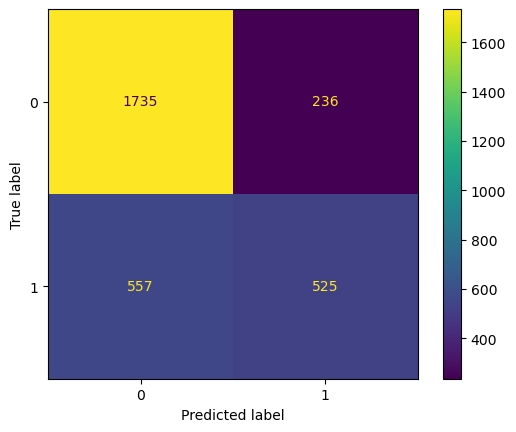

In [255]:
cm = metrics.confusion_matrix(y_test, preds, labels=xgb_cv1.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                     display_labels = xgb_cv1.classes_)
disp.plot();

The model currently seems to lean towards predicting more false negatives than false positives, implying that it's twice as likely to predict a customer won't leave a generous tip when they actually do. In our context, this type of error (Type II) is arguably more acceptable, as it's preferable for taxi drivers to get an unexpected bonus rather than to expect a large tip and be let down. However, we must acknowledge that the model is far from perfect and probably wouldn't be utilized in its current state. Further enhancements and optimizations are required to significantly boost its predictive performance before considering it for real-world deployment.

##### **Feature importance**

Use the `plot_importance` function to inspect the top 10 most important features of the final model.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

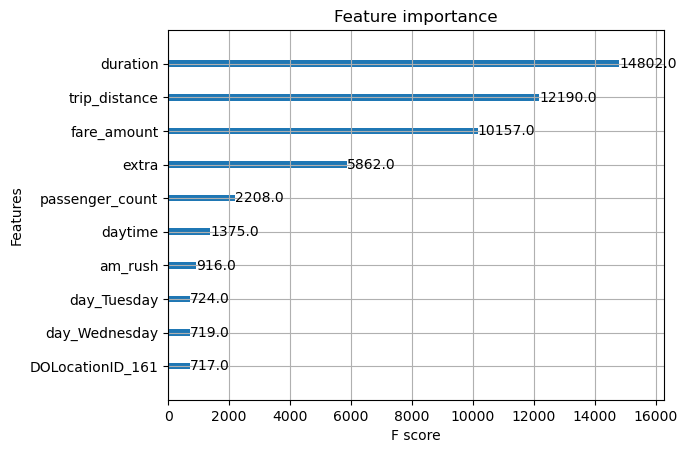

In [411]:
plot_importance(xgb_cv1.best_estimator_,max_num_features=10)

### **Conclusion**

While the current model isn't ideal, it could still serve some utility, particularly in giving taxi drivers a general sense of whether a customer is likely to tip generously. However, to gauge its effectiveness and real-world implications more accurately, it would be beneficial to test the model with a small group of taxi drivers and collect their feedback.

Unfortunately, XGBoost, our top-performing model, isn't inherently interpretable. We do know that duration, trip_distance, and fare_amount are key features influencing the predictions, but a clearer understanding of how these features interact and impact tipping requires more detailed investigation.

As for additional feature engineering, the possibilities are indeed endless. In the context of our current project, some potential improvements could include creating categories for trip distance (short, medium, long), or engineering a feature that indicates the ratio between the fare amount and the nearest higher multiple of $5 or $10. The underlying idea is that customers might round up their tip amounts, implying that journeys with fares just below a multiple of $5 or $10 may receive lower tip percentages than those just above. These newly engineered features could potentially enhance the predictive power of our model.